In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
auto = pd.read_csv('../datasets/Auto.csv')

In [6]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Quantitative - mpg, cylinders,displacement,horsepower,weight,acceleration,year


Qualitative - origin ,name 

In [10]:
auto.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
year             13
origin            3
name            304
dtype: int64

In [30]:
auto[auto['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [31]:
# horsepower is object converting to float
auto['horsepower'] = auto['horsepower'].apply(lambda x:float(x) if x!='?' else 0)

In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [32]:
auto[auto.columns[0:7]].max()

mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
dtype: float64

In [33]:

auto[auto.columns[0:7]].min() 

mpg                9.0
cylinders          3.0
displacement      68.0
horsepower         0.0
weight          1613.0
acceleration       8.0
year              70.0
dtype: float64

In [42]:
auto.drop(auto.index[10:85]).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,24.409317,5.378882,187.680124,99.978261,2936.807453,15.700621,77.130435,1.596273
std,7.913357,1.657398,100.120925,37.671843,810.987533,2.706436,3.131849,0.815572
min,11.000000,3.000000,68.000000,0.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2216.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.500000,90.000000,2797.500000,15.500000,77.000000,1.000000
75%,30.650000,6.000000,250.000000,115.000000,3516.000000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


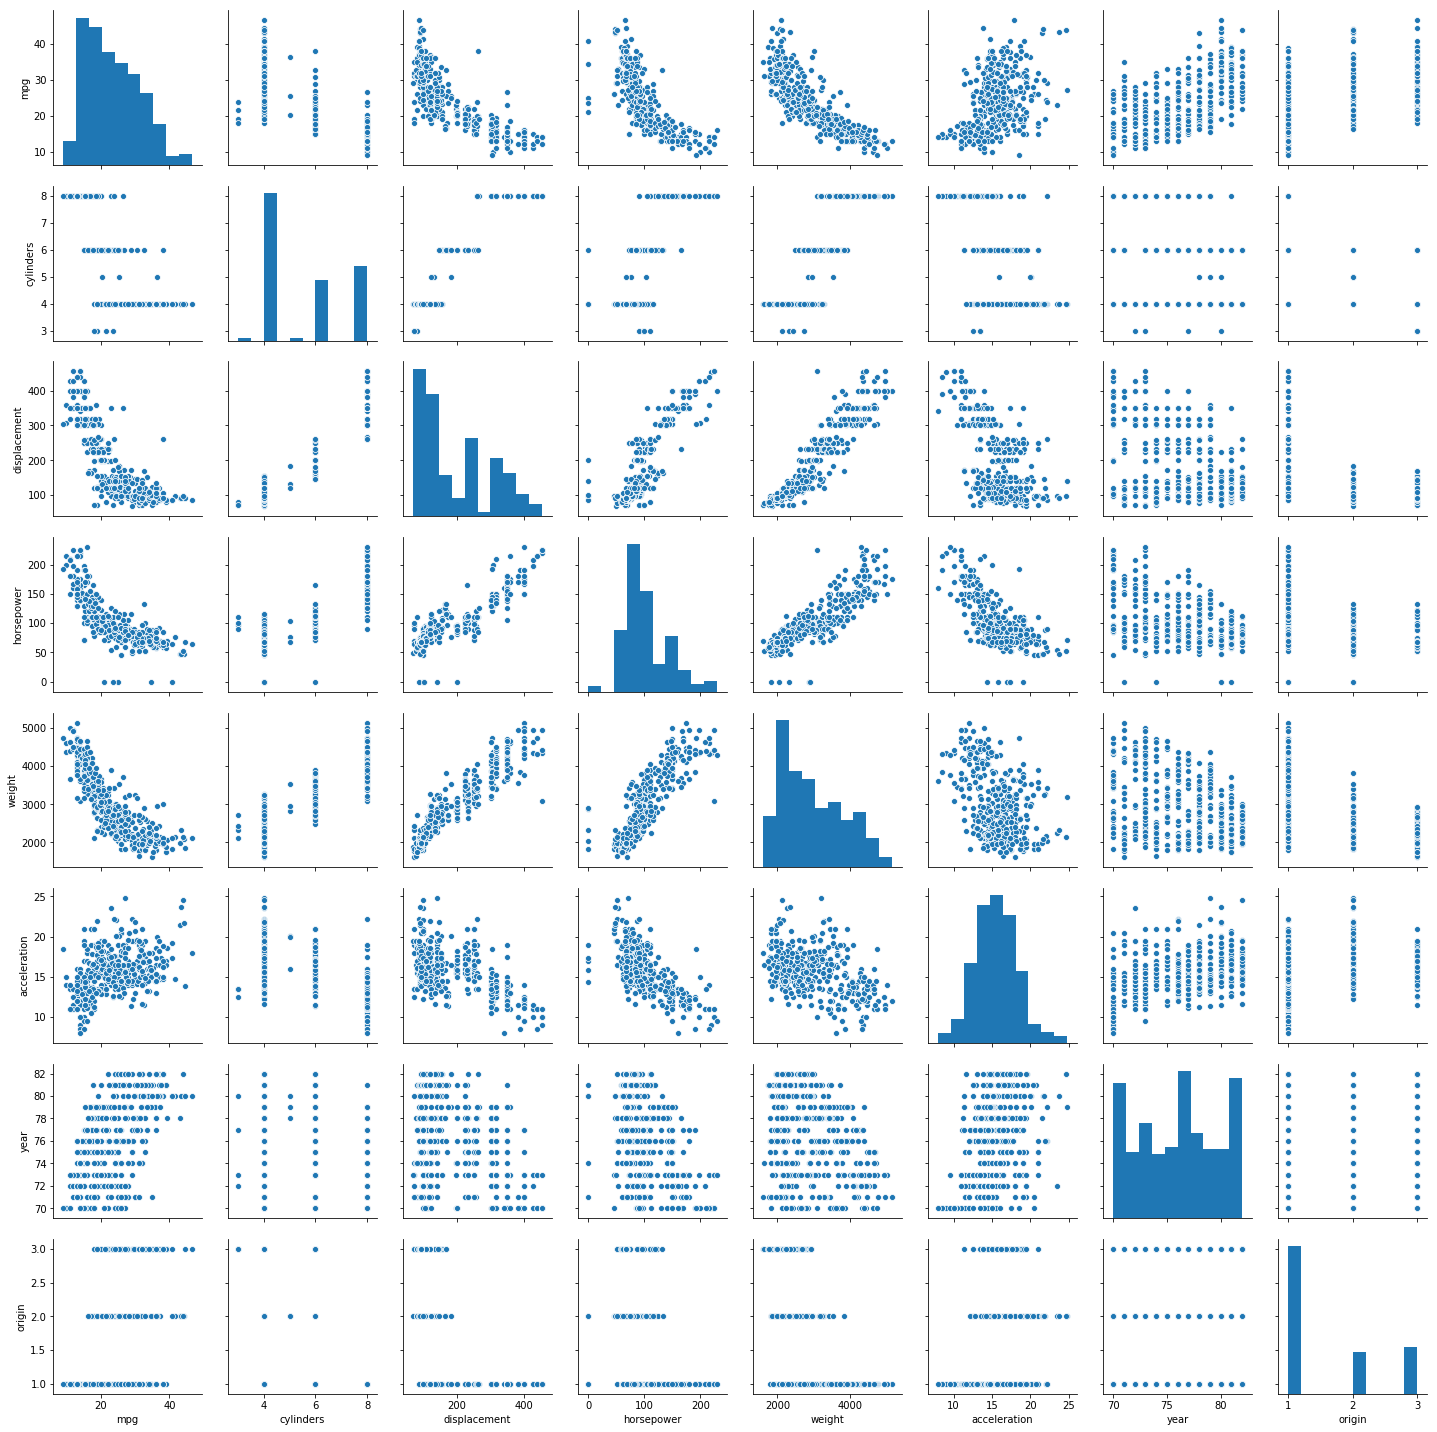

In [43]:
sns.pairplot(auto)

mpg is strongly correlated with acceleration , weight , horsepower and displacement

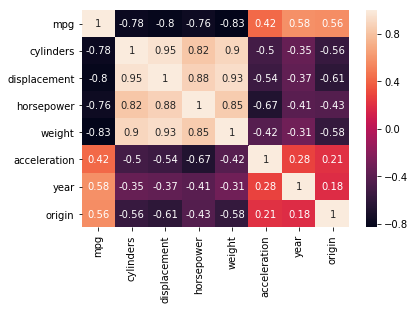

In [44]:
sns.heatmap(auto.corr(),annot=True)